<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Matplotlib **Distribuição, Quantidades, `Seaborn`**

Entenda aqui como empregar gráficos de distribuição, gráficos de barras e a biblioteca `seaborn`.

<br>

Referências e Materiais úteis para este Lab:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="30%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

* Capítulo [Gráficos com Matplotlib](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c2_parte_1.html)

* Capítulo [Distribuição](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c4_parte_1.html)

* Capítulo [Quantidades e Proporções](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c5_parte_1.html)

* https://matplotlib.org/

* https://matplotlib.org/stable/tutorials/index.html

* https://matplotlib.org/stable/gallery/index.html


---



# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns


# **CASE: Boston Housing Dataset**

Os exercícios a seguir empregam o dataset Boston Housing Dataset. Este é um conjunto de dados coletado pelo US Census Service (1993) sobre moradias na área de Boston, MA. Estão presentes os seguintes dados das 

- CRIM - taxa de criminalidade per capita por cidade
- ZN - proporção de terreno residencial zoneada para lotes acima de 25.000 m2.
- INDUS - proporção de hectares de negócios não varejistas por cidade.
- CHAS - Variável fictícia Charles River (1 se a área limita o rio; 0 caso contrário)
- NOX - concentração de óxidos nítricos (partes por 10 milhões)
- RM - número médio de divisões por habitação
- AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940
- DIS - distâncias ponderadas para cinco centros de emprego de Boston
- RAD - índice de acessibilidade às rodovias radiais
- TAX - valor total do imposto predial por USD\$ 10.000
- PTRATIO - relação aluno-professor por município
B - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade
- LSTAT - % de status inferior da população
- MEDV - Valor médio de casas ocupadas pelo proprietário em US\$ 1.000

In [2]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
df.drop(columns='b',inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Exercício 1  

Compare visualmente os valores médios das casas para os diferentes índices de acessibilidade às rodovias radiais, fazendo um gráfico do `matplotlib` e o equivalente do `seaborn`, ambos na mesma figura no modo `artist layer`.

Q. Qual índice de acessibilidade às rodovias radiais apresenta em média preços de casas maiores? 

**Extra**: Você saberia corrigir o gráfico do `matplotlib` para uma melhor apresentação com os valores médios de cada `rad`? Dica: empregue `set_xticks()`.

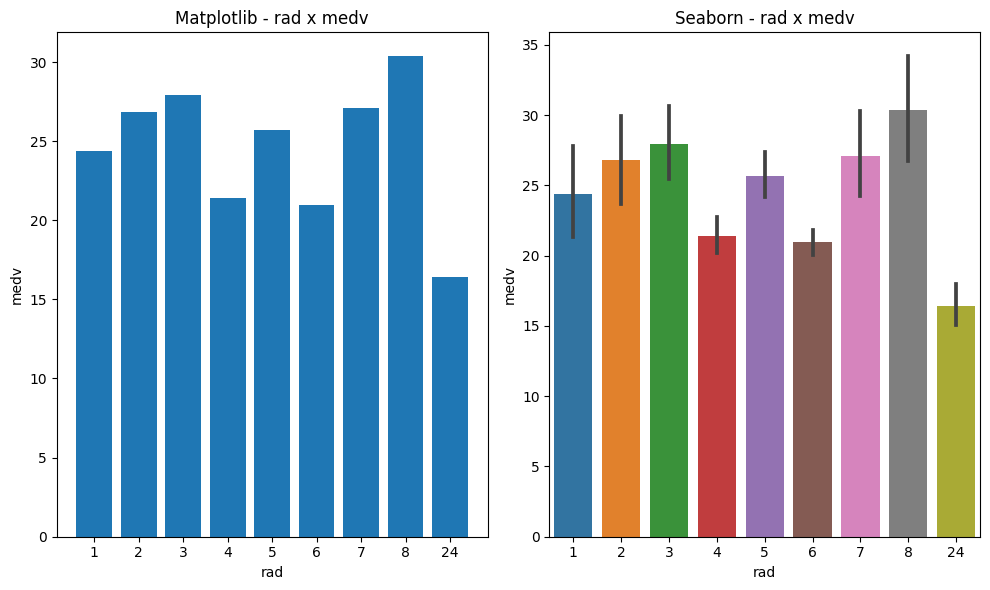

In [3]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
df_temp = df.sort_values('rad')
df_temp = df_temp[['rad', 'medv']]
x = df_temp['rad']
y = df_temp['medv']
unique_rads = list(df_temp['rad'].unique())
medias = []
for rad in unique_rads:
  medias.append(df_temp[df_temp['rad'] == rad]['medv'].mean())

mplot = axs[0]
seab = axs[1]

mplot.bar(np.arange(0,len(unique_rads)), medias)
mplot.set_xticks(np.arange(0,len(unique_rads)), unique_rads)
mplot.set_title('Matplotlib - rad x medv')
mplot.set_xlabel('rad')
mplot.set_ylabel('medv')

sns.barplot(x = 'rad', y='medv', data = df_temp, ax = seab)
seab.set_title('Seaborn - rad x medv')

plt.tight_layout()


# Exercício 2 

Muitas vezes o valores médios apresentados nos gráficos anteriores podem esconder discrepâncias, como no caso de haver poucas instâncias de dados para um determinado `rad`. Faça um gráfico de barras para identificar os valores de casas que apresentam maior e menor incerteza. 

Q. Para que índices de acessibilidade os valores apresentados das casas apresentam maior e menor incerteza? 

**Extra**: 
1. Você saberia dar destaque no gráfico para o valor de `rad` onde os preços apresentam maior incerteza?
2. Que solução você adotaria para poder comparar em um mesmo gráfico os preços e a incerteza, baseado no maior ou menor número de amostras? 

Você poderia pensar em empregar um histograma... mas não parece uma boa ideia.

In [4]:
# seu código

# Exercício 3

A incerteza pode ser causada pela presença de *outliers* nos dados. Faça um gráfico de distribuição dos preços para cada índice de acessibilidade, com `matplotlib` e o equivalente com o `seaborn`, ambos na mesma figura no modo `artist layer`.

Q. Para que índices de acessibilidade apresentam preços com  mais incerteza por esse critério? 

Q. Para que índices de acessibilidade apresentam preços com  maior possibilidade de valores discrepantes para baixo? 

Text(0.5, 1.0, 'Seaborn - rad x medv')

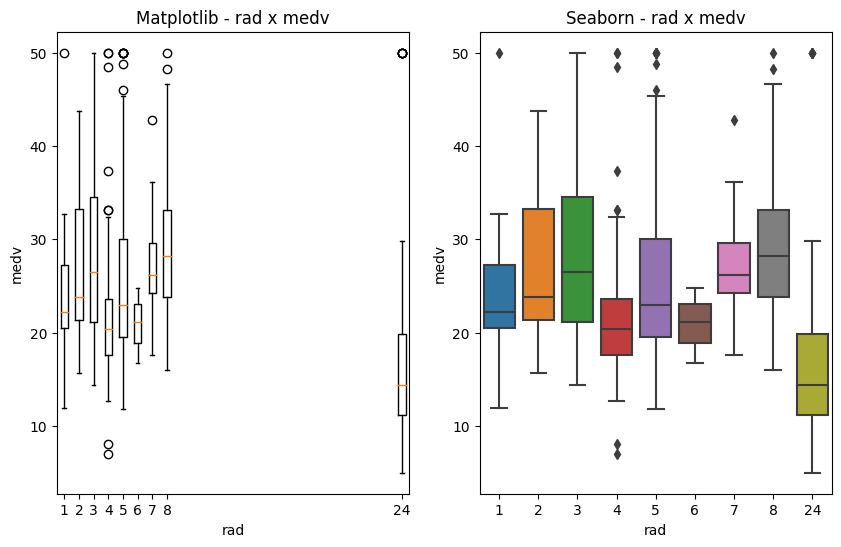

In [5]:
# seu código
# seu código
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
df_temp = df.sort_values('rad')
df_temp = df_temp[['rad', 'medv']]
mplot = axs[0]
seab = axs[1]

unique_rad = list(df_temp['rad'].unique())

for rad in unique_rad:
  mplot.boxplot(df_temp[df_temp['rad'] == rad]['medv'], positions = [rad], widths=0.5)

mplot.set_title('Matplotlib - rad x medv')
mplot.set_xlabel('rad')
mplot.set_ylabel('medv')
 
sns.boxplot(x = 'rad', y = 'medv', data = df_temp, ax = seab)
seab.set_title('Seaborn - rad x medv')

In [6]:
df_temp = df.sort_values('rad')
df_temp = df_temp[['rad', 'medv']]
for rad in list(df_temp['rad'].unique()):
  
  dff_temp = df_temp[df_temp['rad'] == rad]
  qnt = len(dff_temp)
  q1, q3= np.percentile(dff_temp['medv'],[25,75])
  iqr = q3 - q1
  barreira_baixo = q1 - 1.5*iqr
  barreira_cima = q3 + 1.5*iqr
  outlier_cima = len(dff_temp[dff_temp['medv']>barreira_cima])
  outlier_baixo = len(dff_temp[dff_temp['medv']<barreira_baixo])
  qnt_outliers = outlier_cima + outlier_baixo

  print(f'rad = {rad} | outliers = {qnt_outliers}; cima = {outlier_cima}, baixo = {outlier_baixo}; qnt_dados = {qnt}')

rad = 1 | outliers = 1; cima = 1, baixo = 0; qnt_dados = 20
rad = 2 | outliers = 0; cima = 0, baixo = 0; qnt_dados = 24
rad = 3 | outliers = 0; cima = 0, baixo = 0; qnt_dados = 38
rad = 4 | outliers = 8; cima = 6, baixo = 2; qnt_dados = 110
rad = 5 | outliers = 8; cima = 8, baixo = 0; qnt_dados = 115
rad = 6 | outliers = 0; cima = 0, baixo = 0; qnt_dados = 26
rad = 7 | outliers = 1; cima = 1, baixo = 0; qnt_dados = 17
rad = 8 | outliers = 2; cima = 2, baixo = 0; qnt_dados = 24
rad = 24 | outliers = 5; cima = 5, baixo = 0; qnt_dados = 132


# Exercício 4

Outro aspecto importante sobre os dados é a sua distribuição. Faça os gráficos de distribuição dos seguintes valores:

```
['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv'] 
```
 
De preferência empregue múltiplos gráficos na mesma figura. Empregue o `matplotlib` ou o `seaborn`, como preferir. Em seguida responda as perguntas.

Q. Qual atributo apresenta uma distribuição claramente bicaudal?

Q. Qual atributo apresenta uma distribuição mais próxima da normal? 

Q. Qual é aproximadamente a probabilidade um imóvel estar a menos de 5 milhas dos centros de emprego? 

Q. Qual é aproximadamente a probabilidade um imóvel ter um preço inferior a USD 22000?


In [7]:
# seu código
from scipy.stats import kde, norm
import statistics as s

<ipython-input-8-48d0fd36a10f>:7: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(df_de_interesse)


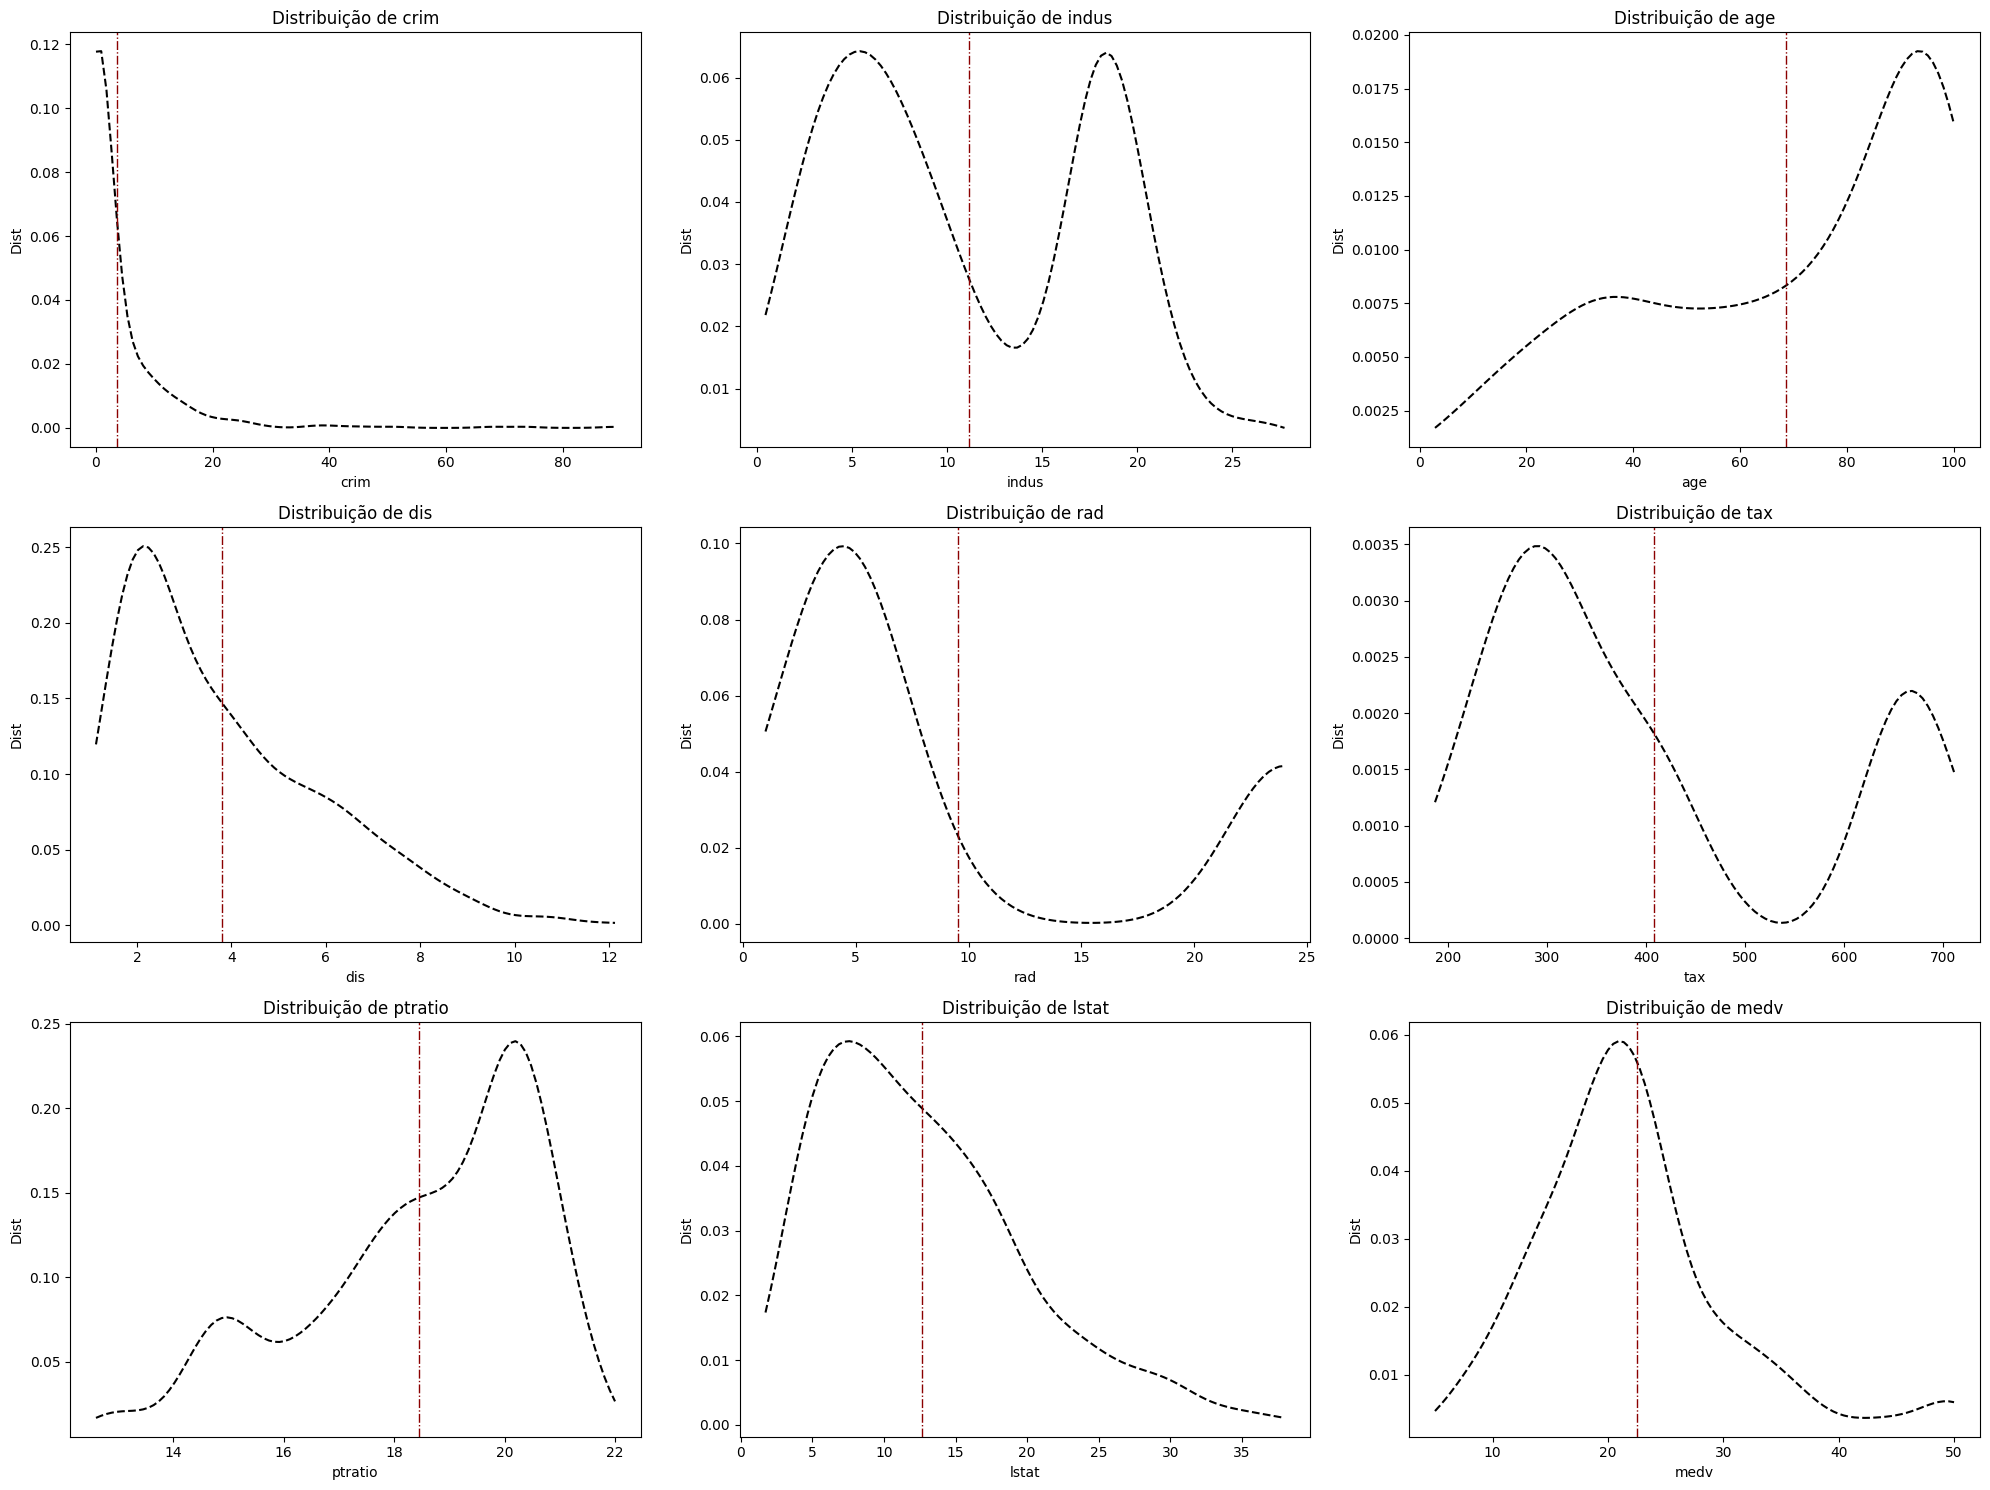

In [8]:
fig, axs = plt.subplots(3, 3, figsize = (20,15))

atts = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(atts)):
  df_de_interesse = df[atts[i]]
  density = kde.gaussian_kde(df_de_interesse)
  x = np.linspace(df_de_interesse.min(), df_de_interesse.max(), 100)
  y = density(x)
  media = df[atts[i]].mean()

  axsr = axs.reshape(-1)[i]
  axsr.set_title(f'Distribuição de {atts[i]}')
  axsr.set_xlabel(f'{atts[i]}')
  axsr.set_ylabel('Dist')
  axsr.plot(x,y,'--k')
  axsr.axvline(media,linewidth=1,linestyle='-.',color='darkred') 

plt.tight_layout()
plt.show()

In [9]:
dist_centro = df['dis']
precos = df['medv']

media_dist_centro = s.mean(dist_centro)
media_precos = s.mean(precos)

stdev_dist_centro = s.stdev(dist_centro)
stdev_precos = s.stdev(precos)

prob_centros = norm.cdf(5, media_dist_centro,stdev_dist_centro)
prob_preco = norm.cdf(22, media_precos, stdev_precos)

print(f'Q7: {prob_centros}\nQ8: {prob_preco}')

Q7: 0.7164180119050731
Q8: 0.4769014102206308
